In [2]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv("C:/Users/umaac/Downloads/car purchase.csv")
data

,User ID,Gender,Age,AnnualSalary,Purchased,Car Purchase Date
0,385,Male,35,20000,0,08-12-2021
1,681,Male,40,43500,0,09-12-2021
2,353,Male,49,74000,0,10-12-2021
3,895,Male,40,107500,1,11-12-2021
4,661,Male,25,79000,0,12-12-2021
...,...,...,...,...,...,...
995,863,Male,38,59000,0,29-08-2024
996,800,Female,47,23500,0,30-08-2024
997,407,Female,28,138500,1,31-08-2024
998,299,Female,48,134000,1,01-09-2024


In [3]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased,Car Purchase Date
0,385,Male,35,20000,0,08-12-2021
1,681,Male,40,43500,0,09-12-2021
2,353,Male,49,74000,0,10-12-2021
3,895,Male,40,107500,1,11-12-2021
4,661,Male,25,79000,0,12-12-2021


In [4]:
data.tail()

,User ID,Gender,Age,AnnualSalary,Purchased,Car Purchase Date
995,863,Male,38,59000,0,29-08-2024
996,800,Female,47,23500,0,30-08-2024
997,407,Female,28,138500,1,31-08-2024
998,299,Female,48,134000,1,01-09-2024
999,687,Female,44,73500,0,02-09-2024


In [5]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            1000 non-null   int64 
 1   Gender             1000 non-null   object
 2   Age                1000 non-null   int64 
 3   AnnualSalary       1000 non-null   int64 
 4   Purchased          1000 non-null   int64 
 5   Car Purchase Date  1000 non-null   object
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [7]:
data.shape

(1000, 6)

In [8]:
list(data)

['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased', 'Car Purchase Date']

In [9]:
data.isnull().sum()

User ID              0
Gender               0
Age                  0
AnnualSalary         0
Purchased            0
Car Purchase Date    0
dtype: int64

In [10]:
data['Purchased'].value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

In [11]:
data1=data.drop(['Car Purchase Date'],axis=1)

In [12]:
data1

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 51.,  63., 119.,  91., 207., 133., 138.,  75.,  62.,  61.]),
 array([18. , 22.5, 27. , 31.5, 36. , 40.5, 45. , 49.5, 54. , 58.5, 63. ]),
 <BarContainer object of 10 artists>)

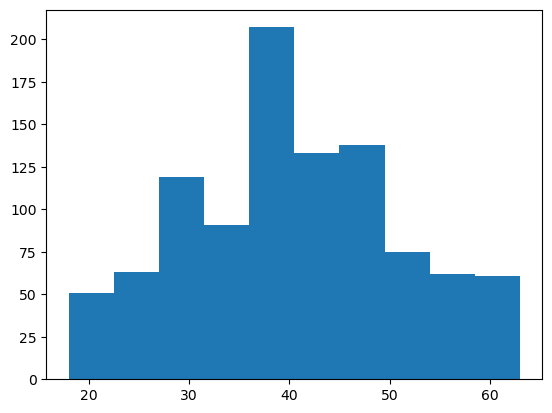

In [14]:
plt.hist(data1['Age'])

In [15]:
data1= pd.get_dummies(data1,dtype=int)
data1

,User ID,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,385,35,20000,0,0,1
1,681,40,43500,0,0,1
2,353,49,74000,0,0,1
3,895,40,107500,1,0,1
4,661,25,79000,0,0,1
...,...,...,...,...,...,...
995,863,38,59000,0,0,1
996,800,47,23500,0,1,0
997,407,28,138500,1,1,0
998,299,48,134000,1,1,0


In [16]:
cor_mat=data1.corr()
cor_mat

,User ID,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
User ID,1.000000,0.017647,0.006541,0.015911,0.039164,-0.039164
Age,0.017647,1.000000,0.166042,0.616036,0.084760,-0.084760
AnnualSalary,0.006541,0.166042,1.000000,0.364974,0.063301,-0.063301
Purchased,0.015911,0.616036,0.364974,1.000000,0.047211,-0.047211
Gender_Female,0.039164,0.084760,0.063301,0.047211,1.000000,-1.000000
Gender_Male,-0.039164,-0.084760,-0.063301,-0.047211,-1.000000,1.000000


Text(0.5, 1.0, 'Purchased and not purchased')

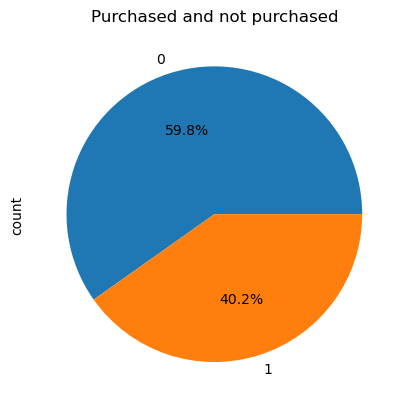

In [17]:
data1["Purchased"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Purchased and not purchased")

In [18]:
y=data1['Purchased']#copied to check
x=data1.drop('Purchased',axis=1) #removed for model

In [19]:
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [20]:
x

,User ID,Age,AnnualSalary,Gender_Female,Gender_Male
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,0,1
4,661,25,79000,0,1
...,...,...,...,...,...
995,863,38,59000,0,1
996,800,47,23500,1,0
997,407,28,138500,1,0
998,299,48,134000,1,0


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42) 

In [22]:
x_train

,User ID,Age,AnnualSalary,Gender_Female,Gender_Male
541,582,50,29500,0,1
440,169,47,107000,1,0
482,430,42,75000,1,0
422,31,28,59500,1,0
778,359,48,47500,1,0
...,...,...,...,...,...
106,398,36,56500,0,1
270,35,42,53000,1,0
860,626,37,33000,1,0
435,931,43,112000,1,0


In [23]:
x_test

,User ID,Age,AnnualSalary,Gender_Female,Gender_Male
521,176,41,73500,0,1
737,448,59,135500,0,1
740,391,25,59500,0,1
660,623,47,42500,1,0
411,773,46,135500,1,0
...,...,...,...,...,...
468,66,59,106500,1,0
935,539,35,65000,1,0
428,71,42,46500,0,1
7,588,42,64000,0,1


In [24]:
y_test

521    0
737    1
740    0
660    1
411    0
      ..
468    1
935    0
428    0
7      0
155    1
Name: Purchased, Length: 300, dtype: int64

In [25]:
y_train

541    1
440    1
482    0
422    0
778    1
      ..
106    0
270    0
860    0
435    1
102    0
Name: Purchased, Length: 700, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train) #for fitting and training the model

LogisticRegression()

In [27]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], d

In [28]:
from sklearn.metrics import confusion_matrix  #[ tp tn ]
                                              #[ fp fn ]
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[156  16]
 [ 39  89]]


In [29]:
from sklearn.metrics import accuracy_score  #tp+tn/tp+tn+fp+fn
accuracy_score(y_test,y_pred)

0.8166666666666667

In [30]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_pred,y_test)

<Axes: >

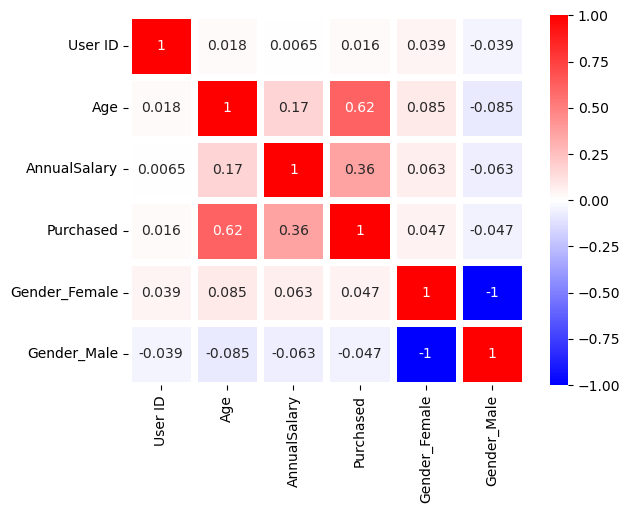

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cor_mat,vmax=1,vmin=-1,annot=True,linewidth=5,cmap='bwr')

Text(120.72222222222221, 0.5, 'Actual value')

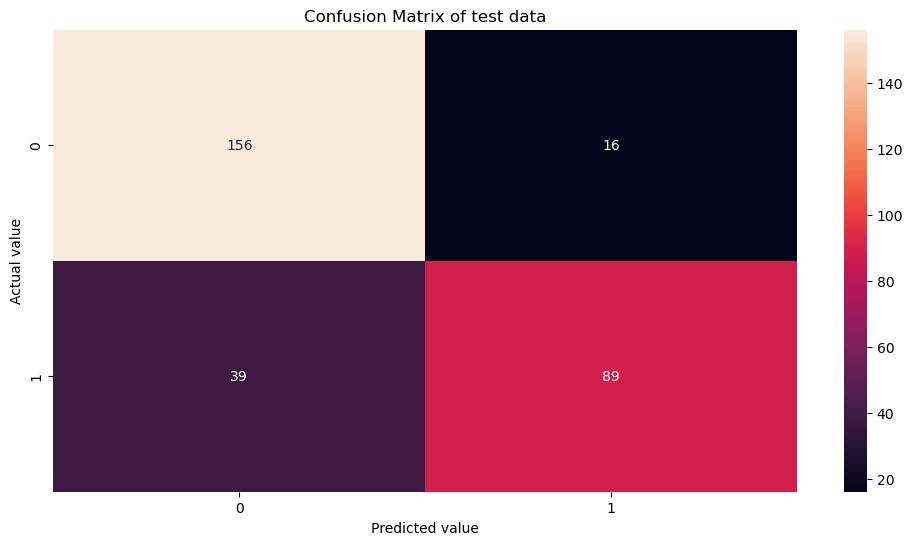

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of test data")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.18333333333333332

In [34]:
Results=pd.DataFrame(columns=['AnnualSalary','Predicted'])
Results['AnnualSalary']=y_test
Results['Predicted']=y_pred
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(15)

,index,AnnualSalary,Predicted,ID
0,521,0,0,0
1,737,1,1,1
2,740,0,0,2
3,660,1,0,3
4,411,0,1,4
5,678,1,1,5
6,626,1,1,6
7,513,0,0,7
8,859,0,0,8
9,136,0,0,9


[]

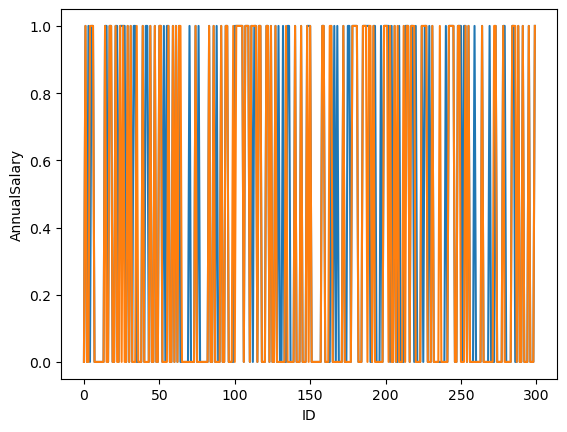

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='AnnualSalary',data=Results.head(300))
sns.lineplot(x='ID',y='Predicted',data=Results.head(300))
plt.plot()